In [1]:
# Install genetic Algorithm python library to run feature selection
# !pip install geneticalgorithm

In [1]:
import numpy as np
import pandas as pd 
import os
import datetime as dt
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from datetime import datetime
from dateutil.parser import parse
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score 
from geneticalgorithm import geneticalgorithm as ga

In [2]:
#Reset Pandas to show all rows & columns
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

# Loading Second dataset

In [3]:
# Loading second dataset
second_dataset = pd.read_csv("./IoT Network Intrusion Dataset/IoT Network Intrusion Dataset.csv")

In [4]:
#Getting the dataset Info (datatypes and number of features/columns)
second_dataset.head(10)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.00,0.000000,75.0,75.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.00,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.00,2261.327486,4254.0,1056.0,0.0,0.000000,0.000000,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.00,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.50,0.707107,71.0,70.0,0.0,0.000000,0.000000,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.50,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.00,0.000000,151.0,151.0,0.0,0.000000,0.000000,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.00,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.50,0.707107,77.0,76.0,76.0,76.000000,0.000000,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.50,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
5,192.168.0.24-101.79.244.148-41980-443-6,192.168.0.24,41980,101.79.244.148,443,6,10/09/2019 01:39:13 AM,157,2,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,19108.280255,78.50,6.363961,83.0,

## Checking For Empty, missing, Inifinite or duplicates in second dataset

In [5]:
#Check for instances in the dataset that are not available
second_dataset.isna().sum()

Flow_ID              0
Src_IP               0
Src_Port             0
Dst_IP               0
Dst_Port             0
Protocol             0
Timestamp            0
Flow_Duration        0
Tot_Fwd_Pkts         0
Tot_Bwd_Pkts         0
TotLen_Fwd_Pkts      0
TotLen_Bwd_Pkts      0
Fwd_Pkt_Len_Max      0
Fwd_Pkt_Len_Min      0
Fwd_Pkt_Len_Mean     0
Fwd_Pkt_Len_Std      0
Bwd_Pkt_Len_Max      0
Bwd_Pkt_Len_Min      0
Bwd_Pkt_Len_Mean     0
Bwd_Pkt_Len_Std      0
Flow_Byts/s          0
Flow_Pkts/s          0
Flow_IAT_Mean        0
Flow_IAT_Std         0
Flow_IAT_Max         0
Flow_IAT_Min         0
Fwd_IAT_Tot          0
Fwd_IAT_Mean         0
Fwd_IAT_Std          0
Fwd_IAT_Max          0
Fwd_IAT_Min          0
Bwd_IAT_Tot          0
Bwd_IAT_Mean         0
Bwd_IAT_Std          0
Bwd_IAT_Max          0
Bwd_IAT_Min          0
Fwd_PSH_Flags        0
Bwd_PSH_Flags        0
Fwd_URG_Flags        0
Bwd_URG_Flags        0
Fwd_Header_Len       0
Bwd_Header_Len       0
Fwd_Pkts/s           0
Bwd_Pkts/s 

In [6]:
#Check for empty instances in the dataset
second_dataset.isnull().sum()

Flow_ID              0
Src_IP               0
Src_Port             0
Dst_IP               0
Dst_Port             0
Protocol             0
Timestamp            0
Flow_Duration        0
Tot_Fwd_Pkts         0
Tot_Bwd_Pkts         0
TotLen_Fwd_Pkts      0
TotLen_Bwd_Pkts      0
Fwd_Pkt_Len_Max      0
Fwd_Pkt_Len_Min      0
Fwd_Pkt_Len_Mean     0
Fwd_Pkt_Len_Std      0
Bwd_Pkt_Len_Max      0
Bwd_Pkt_Len_Min      0
Bwd_Pkt_Len_Mean     0
Bwd_Pkt_Len_Std      0
Flow_Byts/s          0
Flow_Pkts/s          0
Flow_IAT_Mean        0
Flow_IAT_Std         0
Flow_IAT_Max         0
Flow_IAT_Min         0
Fwd_IAT_Tot          0
Fwd_IAT_Mean         0
Fwd_IAT_Std          0
Fwd_IAT_Max          0
Fwd_IAT_Min          0
Bwd_IAT_Tot          0
Bwd_IAT_Mean         0
Bwd_IAT_Std          0
Bwd_IAT_Max          0
Bwd_IAT_Min          0
Fwd_PSH_Flags        0
Bwd_PSH_Flags        0
Fwd_URG_Flags        0
Bwd_URG_Flags        0
Fwd_Header_Len       0
Bwd_Header_Len       0
Fwd_Pkts/s           0
Bwd_Pkts/s 

In [7]:
# Check for infinity values
second_dataset.isin([np.inf, -np.inf]).any()

Flow_ID              False
Src_IP               False
Src_Port             False
Dst_IP               False
Dst_Port             False
Protocol             False
Timestamp            False
Flow_Duration        False
Tot_Fwd_Pkts         False
Tot_Bwd_Pkts         False
TotLen_Fwd_Pkts      False
TotLen_Bwd_Pkts      False
Fwd_Pkt_Len_Max      False
Fwd_Pkt_Len_Min      False
Fwd_Pkt_Len_Mean     False
Fwd_Pkt_Len_Std      False
Bwd_Pkt_Len_Max      False
Bwd_Pkt_Len_Min      False
Bwd_Pkt_Len_Mean     False
Bwd_Pkt_Len_Std      False
Flow_Byts/s           True
Flow_Pkts/s           True
Flow_IAT_Mean        False
Flow_IAT_Std         False
Flow_IAT_Max         False
Flow_IAT_Min         False
Fwd_IAT_Tot          False
Fwd_IAT_Mean         False
Fwd_IAT_Std          False
Fwd_IAT_Max          False
Fwd_IAT_Min          False
Bwd_IAT_Tot          False
Bwd_IAT_Mean         False
Bwd_IAT_Std          False
Bwd_IAT_Max          False
Bwd_IAT_Min          False
Fwd_PSH_Flags        False
B

In [8]:
# Replace infinite values with zeros
second_dataset.replace([np.inf, -np.inf], 0, inplace=True)

In [9]:
# The columns with infinte are 
print("The columns with infinite are - ", second_dataset.columns[second_dataset.isin([np.inf, -np.inf]).any()])

The columns with infinite are -  Index([], dtype='object')


In [10]:
second_dataset.nunique()

Flow_ID              64064
Src_IP               57985
Src_Port             11205
Dst_IP                 478
Dst_Port              1034
Protocol                 3
Timestamp             4304
Flow_Duration        12670
Tot_Fwd_Pkts           116
Tot_Bwd_Pkts            42
TotLen_Fwd_Pkts       2479
TotLen_Bwd_Pkts       2612
Fwd_Pkt_Len_Max       1156
Fwd_Pkt_Len_Min       1165
Fwd_Pkt_Len_Mean      2174
Fwd_Pkt_Len_Std       1614
Bwd_Pkt_Len_Max       1114
Bwd_Pkt_Len_Min       1191
Bwd_Pkt_Len_Mean      2620
Bwd_Pkt_Len_Std       2239
Flow_Byts/s          32117
Flow_Pkts/s          19979
Flow_IAT_Mean        21680
Flow_IAT_Std         30800
Flow_IAT_Max         12399
Flow_IAT_Min         11041
Fwd_IAT_Tot           1922
Fwd_IAT_Mean          8401
Fwd_IAT_Std          18297
Fwd_IAT_Max           1793
Fwd_IAT_Min           1196
Bwd_IAT_Tot          12341
Bwd_IAT_Mean         13560
Bwd_IAT_Std           4676
Bwd_IAT_Max          12223
Bwd_IAT_Min          11529
Fwd_PSH_Flags            1
B

In [11]:
# Check for duplicates on each row.
second_dataset.duplicated().value_counts()

False    461837
True     163946
Name: count, dtype: int64

In [12]:
# From the values above theres indication of 163946 duplicated rows

# Get exactly all the duplicates (including the first occurrence)
duplicated_rows = second_dataset[second_dataset.duplicated(keep=False)]

# Display the exact duplicates
print("Exact duplicates in the dataset")
duplicated_rows.head(10)

Exact duplicates in the dataset


,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.0,1430.0,1430.0,1430.0,0.000000,3.216000e+07,26666.666667,75.000000,0.000000,75.0,75.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.0,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.000000,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
7,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,0.0,2896.0,0.0,0.0,0.0,0.0,1448.0,1448.0,1448.0,0.000000,2.585714e+07,17857.142857,112.000000,0.000000,112.0,112.0,0.0,0.0,0.000000,0.0,0.0,112.0,112.00,0.0,112.0,112.0,0,0,0,0,0,64,0.000000,17857.142857,1448.0,1448.0,1448.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2172.000000,0.0,1448.0,0,0,0,0,0,0,0,0,2,2896,-1,155,0,0,0.0,0.0,0.0,0.0,112.000000,0.000000,112.0,112.0,Anomaly,Scan,Scan Port OS
11,192.168.0.24-104.118.134.215-43238-443-6,104.118.134.215,443,192.168.0.24,43238,6,25/07/2019 03:26:18 AM,165,1,1,1441.0,1441.0,1441.0,1441.0,1441.0,0.0,1441.0,1441.0,1441.0,0.000000,1.746667e+07,12121.212121,165.000000,0.000000,165.0,165.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,32,32,6060.606061,6060.606061,1441.0,1441.0,1441.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,1.0,2161.500000,1441.0,1441.0,0,0,0,0,0,0,1,1441,1,1441,-1,252,1,0,0.0,0.0,0.0,0.0,165.000000,0.000000,165.0,165.0,Anomaly,Mirai,Mirai-UDP Flooding
12,192.168.0.13-52.219.36.20-53604-443-6,192.168.0.13,53604,52.219.36.20,443,6,25/07/2019 03:24:59 AM,199,2,1,2800.0,1400.0,1400.0,1400.0,1400.0,0.0,1400.0,1400.0,1400.0,0.000000,2.110553e+07,15075.376884,99.500000,33.234019,123.0,76.0,76.0,76.0,0.000000,76.0,76.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,40,20,10050.251256,5025.125628,1400.0,1400.0,1400.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,1866.666667,1400.0,1400.0,0,0,0,0,0,0,2,2800,1,1400,-1,2800,2,0,0.0,0.0,0.0,0.0,99.500000,33.234019,123.0,76.0,Anomaly,Mirai,Mirai-UDP Flooding
13,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:48 AM,212,3,1,4290.0,1430.0,1430.0,1430.0,1430.0,0.0,1430.0,1430.0,1430.0,0.000000,2.698113e+07,18867.924528,70.666667,0.577350,71.0,70.0,141.0,70.5,0.707107,71.0,70.0,0.0,0.00,0.0,0.0,0.0,0,0,0,0,24,8,14150.943396,4716.981132,1430.0,1430.0,1430.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0.0,1787.500000,1430.0,1430.0,0,0,0,0,0,0,3,4290,1,1430,-1,-1,3,0,0.0,0.0,0.0,0.0,70.666667,0.577350,71.0,70.0,Anomaly,Mirai,Mirai-HTTP Flooding
16,192.168.0.13-192.168.0.16-56361-10101-17,192.168.0.13,56361,192.168.0.16,10101,17,25/07/2019 03:24:09 AM,293,0,5,0.0,168.0,0.0,0.0,0.0,0.0,40.0,32.0,33.6,3.577709,5.733788e+05,17064.846416,73.250000,0.500000,74.0,73.0,0.0,0.0,0.00000

In [13]:
# Show multiple instances of the second duplicated row

# Get the second duplicated row from the extracted duplicates
second_duplicated_row = duplicated_rows.iloc[1]

# Filter the extracted duplicates to get all instances of the second duplicated row 
instances_second_duplicated_row = duplicated_rows[duplicated_rows.eq(second_duplicated_row).all(axis=1)]

# Display all instances of the second duplicated row
instances_second_duplicated_row

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
7,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,0.0,2896.0,0.0,0.0,0.0,0.0,1448.0,1448.0,1448.0,0.0,2.585714e+07,17857.142857,112.0,0.0,112.0,112.0,0.0,0.0,0.0,0.0,0.0,112.0,112.0,0.0,112.0,112.0,0,0,0,0,0,64,0.0,17857.142857,1448.0,1448.0,1448.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,2172.0,0.0,1448.0,0,0,0,0,0,0,0,0,2,2896,-1,155,0,0,0.0,0.0,0.0,0.0,112.0,0.0,112.0,112.0,Anomaly,Scan,Scan Port OS
254747,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,0.0,2896.0,0.0,0.0,0.0,0.0,1448.0,1448.0,1448.0,0.0,2.585714e+07,17857.142857,112.0,0.0,112.0,112.0,0.0,0.0,0.0,0.0,0.0,112.0,112.0,0.0,112.0,112.0,0,0,0,0,0,64,0.0,17857.142857,1448.0,1448.0,1448.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,2172.0,0.0,1448.0,0,0,0,0,0,0,0,0,2,2896,-1,155,0,0,0.0,0.0,0.0,0.0,112.0,0.0,112.0,112.0,Anomaly,Scan,Scan Port OS
329500,192.168.0.24-58.225.75.83-41467-443-6,192.168.0.24,41467,58.225.75.83,443,6,11/07/2019 01:52:37 AM,112,0,2,0.0,2896.0,0.0,0.0,0.0,0.0,1448.0,1448.0,1448.0,0.0,2.585714e+07,17857.142857,112.0,0.0,112.0,112.0,0.0,0.0,0.0,0.0,0.0,112.0,112.0,0.0,112.0,112.0,0,0,0,0,0,64,0.0,17857.142857,1448.0,1448.0,1448.0,0.0,0.0,0,0,0,0,1,0,0,0,0.0,2172.0,0.0,1448.0,0,0,0,0,0,0,0,0,2,2896,-1,155,0,0,0.0,0.0,0.0,0.0,112.0,0.0,112.0,112.0,Anomaly,Scan,Scan Port OS


In [14]:
# Show multiple instances of the last duplicated row

# Get the last duplicated row from the extracted duplicates
last_duplicated_row = duplicated_rows.iloc[-1]

# Filter the extracted duplicates to get all instances of the third duplicated row 
instances_last_duplicated_row = duplicated_rows[duplicated_rows.eq(last_duplicated_row).all(axis=1)]

# Display all instances of the third duplicated row
instances_last_duplicated_row

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
113182,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:10 AM,198,2,1,2860.0,1430.0,1430.0,1430.0,1430.0,0.0,1430.0,1430.0,1430.0,0.0,2.166667e+07,15151.515152,99.0,32.526912,122.0,76.0,122.0,122.0,0.0,122.0,122.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,16,8,10101.010101,5050.505051,1430.0,1430.0,1430.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,1906.666667,1430.0,1430.0,0,0,0,0,0,0,2,2860,1,1430,-1,-1,2,0,0.0,0.0,0.0,0.0,99.0,32.526912,122.0,76.0,Anomaly,Mirai,Mirai-UDP Flooding
625782,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:10 AM,198,2,1,2860.0,1430.0,1430.0,1430.0,1430.0,0.0,1430.0,1430.0,1430.0,0.0,2.166667e+07,15151.515152,99.0,32.526912,122.0,76.0,122.0,122.0,0.0,122.0,122.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,16,8,10101.010101,5050.505051,1430.0,1430.0,1430.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,1906.666667,1430.0,1430.0,0,0,0,0,0,0,2,2860,1,1430,-1,-1,2,0,0.0,0.0,0.0,0.0,99.0,32.526912,122.0,76.0,Anomaly,Mirai,Mirai-UDP Flooding


In [15]:
#Since there are evidence of duplicated rows therefore the duplicates will be dropped 
cleaned_second_dataset = second_dataset.drop_duplicates()
print("The length of the cleaned second dataset is - ", len(cleaned_second_dataset))
cleaned_second_dataset.head(10)

The length of the cleaned second dataset is -  461837


,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label,Cat,Sub_Cat
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.00,0.000000,75.0,75.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.00,0.000000,75.0,75.0,Anomaly,Mirai,Mirai-Ackflooding
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.00,2261.327486,4254.0,1056.0,0.0,0.000000,0.000000,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.00,2261.327486,4254.0,1056.0,Anomaly,DoS,DoS-Synflooding
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.50,0.707107,71.0,70.0,0.0,0.000000,0.000000,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.50,0.707107,71.0,70.0,Anomaly,Scan,Scan Port OS
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.00,0.000000,151.0,151.0,0.0,0.000000,0.000000,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.00,0.000000,151.0,151.0,Anomaly,Mirai,Mirai-Hostbruteforceg
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.50,0.707107,77.0,76.0,76.0,76.000000,0.000000,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.50,0.707107,77.0,76.0,Anomaly,Mirai,Mirai-Hostbruteforceg
5,192.168.0.24-101.79.244.148-41980-443-6,192.168.0.24,41980,101.79.244.148,443,6,10/09/2019 01:39:13 AM,157,2,1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,19108.280255,78.50,6.363961,83.0,

Cat
Mirai                281243
DoS                   59390
Scan                  56744
Normal                38598
MITM ARP Spoofing     25862
Name: count, dtype: int64


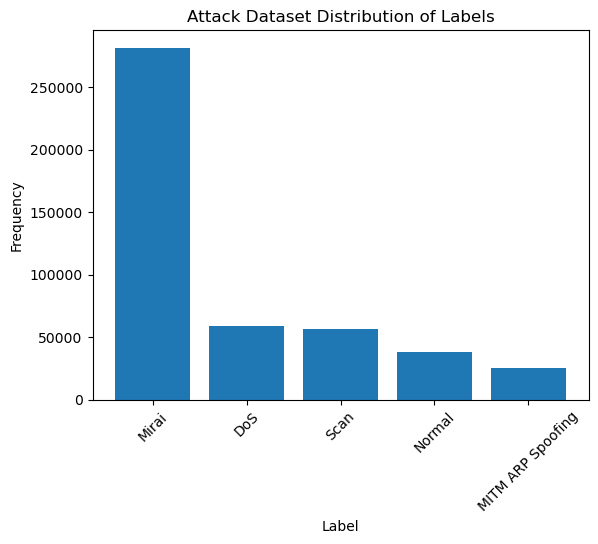

In [16]:
cleaned_second_dataset["Cat"].value_counts()
#The class distribution in the first dataset

# Define the desired label arrangement
desired_labels = ['Mirai', 'DoS', 'Scan', 'Normal', 'MITM ARP Spoofing']

# Count the frequency of each label
label_counts = cleaned_second_dataset['Cat'].value_counts()
print(label_counts.reindex(desired_labels))

# Define the colors for each bar
# colors = ['skyblue', 'green', 'yellow', 'orange', 'gray']

# Reorder the label counts based on the desired arrangement
label_counts_ordered = label_counts.reindex(desired_labels)

# Plot the bar chart
plt.bar(label_counts_ordered.index, label_counts_ordered.values)

# Plot the bar chart
# plt.bar(label_counts.index, label_counts.values, color=colors)

# Add labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Attack Dataset Distribution of Labels')
plt.xticks(rotation = 45)

# Show the plot
plt.show()

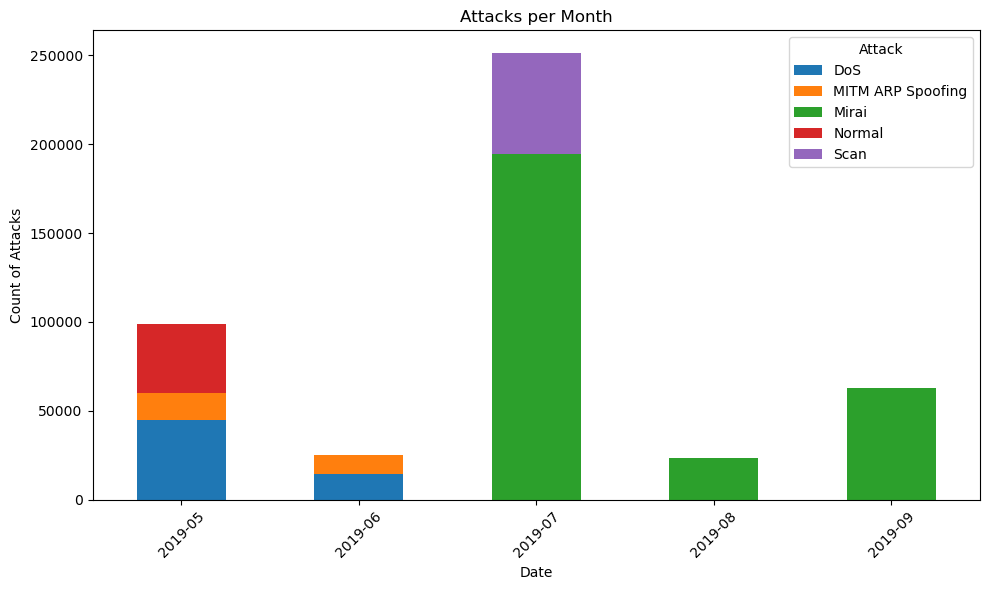

In [17]:
# Plot events per Month 
# Seperate attack and date from 

# Convert the "Timestamp" column to datetime format
cleaned_second_dataset_date_attack = pd.DataFrame(cleaned_second_dataset, columns=["Timestamp", "Cat"])
cleaned_second_dataset_date_attack['Timestamp'] = pd.to_datetime(cleaned_second_dataset_date_attack['Timestamp'], format='%d/%m/%Y %I:%M:%S %p')

# Extract the date by month from the datetime object
cleaned_second_dataset_date_attack['Timestamp'] = cleaned_second_dataset_date_attack['Timestamp'].dt.to_period('M')

# Group the data by Timestamp, and count the occurrences of each Cat/Attack
events_per_month = cleaned_second_dataset_date_attack.groupby(['Timestamp', 'Cat']).size().unstack(fill_value=0)

# Plot the multiple bar chart
events_per_month.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Count of Attacks')
plt.title('Attacks per Month')
plt.legend(title='Attack')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [18]:
# Validating content in the chart by sorting 
sorted_date_cat = cleaned_second_dataset_date_attack.value_counts().sort_index()
sorted_date_cat

Timestamp  Cat              
2019-05    DoS                   44666
           MITM ARP Spoofing     15385
           Normal                38598
2019-06    DoS                   14724
           MITM ARP Spoofing     10477
2019-07    Mirai                194736
           Scan                  56744
2019-08    Mirai                 23404
2019-09    Mirai                 63103
Name: count, dtype: int64

In [19]:
# Validating content in the chart showing each attacks per day and representing those not recoreded has zero
events_per_month

Cat,DoS,MITM ARP Spoofing,Mirai,Normal,Scan
Timestamp,,,,,
2019-05,44666,15385,0,38598,0
2019-06,14724,10477,0,0,0
2019-07,0,0,194736,0,56744
2019-08,0,0,23404,0,0
2019-09,0,0,63103,0,0


##### Cleaning the second_dataset

In [20]:
# First drop the "label" and "sub-cat" columns and renaming the "Cat" column to "Attack" column
#Dropping the "label" and "sub-cat" columns
new_cleaned_second_dataset = cleaned_second_dataset.drop(['Label', 'Sub_Cat'], axis=1)
new_cleaned_second_dataset = new_cleaned_second_dataset.rename(columns={'Cat':'Attack'})

In [21]:
# Displaying the first five rows to verify changes 
new_cleaned_second_dataset.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,Mirai
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,DoS
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,Scan
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,Mirai
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,Mirai


In [22]:
# Rename MITM ARP Spoofing in Attack column to mitm and change all attacks to lowercase 
new_cleaned_second_dataset["Attack"] = new_cleaned_second_dataset["Attack"].str.replace("MITM ARP Spoofing", "mitm")
new_cleaned_second_dataset["Attack"] = new_cleaned_second_dataset["Attack"].str.lower()

In [23]:
# Displaying the first five rows to verify changes 
new_cleaned_second_dataset.head(5)

,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,URG_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Fwd_Byts/b_Avg,Fwd_Pkts/b_Avg,Fwd_Blk_Rate_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Pkts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,192.168.0.13-192.168.0.16-10000-10101-17,192.168.0.13,10000,192.168.0.16,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,0,0,0,1,982,1,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,mirai
1,192.168.0.13-222.160.179.132-554-2179-6,222.160.179.132,2179,192.168.0.13,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,0,0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,0,0,0,1,0,2,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,dos
2,192.168.0.13-192.168.0.16-9020-52727-6,192.168.0.16,52727,192.168.0.13,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,0,0,0,3,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,scan
3,192.168.0.13-192.168.0.16-9020-52964-6,192.168.0.16,52964,192.168.0.13,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,0,0,0,2,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,mirai
4,192.168.0.1-239.255.255.250-36763-1900-17,192.168.0.1,36763,239.255.255.250,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,0,0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,0,0,0,2,886,1,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,mirai


In [24]:
#Comparing the two datasets columns after data cleaning
# print("First dataset now with columns number - ", len(cleaned_first_dataset.columns))
# print(cleaned_first_dataset.columns)
# print("\n")
# print("Second dataset now with columns number - ", len(new_cleaned_second_dataset.columns))
# print(new_cleaned_second_dataset.columns)


In [25]:
# # Check if the all the columns of the dataset match
# if (cleaned_first_dataset.columns.all() == new_cleaned_second_dataset.columns.all()):
#     print("The columns of both datasets are the same!")
# else:
#     print("The columns of both datasets are not the same!")

## Feature Selection

#### More data cleaning and preprocessing before feature selection 
To enable the use of columns with texts and objects, some columns will be converted like the Timestamp column to its integer value in seconds, some columns also only contain zero so they will be dropped and the others which contain objects also will be encoded using label encoder which converts individual values in each column to a number starting from 0
The following columns will be encoded - 
1. Attack column (Each attack will be encoded with a number representing each attack)
2. Flow_ID (The flow_ID served as a unique identifier for each column it will be dropped)
3. Src_IP (IP Address)
4. Dst_IP (IP Address)
5. TimeStamp (Dates are stored in form of objects)
6. 'Fwd_URG_Flags', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_PSH_Flags', 'Bwd_URG_Flags', 'URG_Flag_Cnt',
       'Fwd_Byts/b_Avg', 'Subflow_Bwd_Pkts', 'Flow_ID' (Contains only 0 so it would be dropped)    

#### 
 

In [28]:
#Perform Label encoding to change the values of the Attacks to digits
encoded_merged_dataset = pd.DataFrame(new_cleaned_second_dataset)
#Encode the labels 
Attack_encoder = LabelEncoder()
Src_IP_encoder = LabelEncoder()
Dst_IP_encoder = LabelEncoder()

encoded_merged_dataset['Attack'] = Attack_encoder.fit_transform(encoded_merged_dataset['Attack'])
encoded_merged_dataset['Src_IP'] = Src_IP_encoder.fit_transform(encoded_merged_dataset['Src_IP'])
encoded_merged_dataset['Dst_IP'] = Dst_IP_encoder.fit_transform(encoded_merged_dataset['Dst_IP'])

# Dropping the Flow_ID columns and the columns that contain zero throughout
encoded_merged_dataset = encoded_merged_dataset.drop(['Fwd_URG_Flags', 'Fwd_Pkts/b_Avg', 'Fwd_Blk_Rate_Avg', 'Bwd_PSH_Flags', 'Bwd_URG_Flags', 'URG_Flag_Cnt',
       'Fwd_Byts/b_Avg', 'Subflow_Bwd_Pkts', 'Flow_ID'], axis=1)

In [29]:
# Show the labels and their corresponding encoding for Attack column
dict(zip(Attack_encoder.classes_,range(len(Attack_encoder.classes_))))

{'dos': 0, 'mirai': 1, 'mitm': 2, 'normal': 3, 'scan': 4}

In [30]:
# Show the labels and their corresponding encoding for Src_IP column
dict(zip(Src_IP_encoder.classes_,range(len(Src_IP_encoder.classes_))))

{'1.201.137.64': 0,
 '1.225.35.109': 1,
 '1.225.35.17': 2,
 '101.79.208.75': 3,
 '101.79.209.13': 4,
 '101.79.209.173': 5,
 '101.79.244.148': 6,
 '104.118.134.215': 7,
 '104.74.152.109': 8,
 '104.74.213.186': 9,
 '104.75.19.88': 10,
 '104.75.26.48': 11,
 '104.75.30.192': 12,
 '104.76.70.198': 13,
 '104.76.72.212': 14,
 '104.76.84.32': 15,
 '108.177.125.188': 16,
 '108.177.97.109': 17,
 '108.177.97.188': 18,
 '108.177.97.189': 19,
 '108.177.97.192': 20,
 '110.76.141.203': 21,
 '110.76.141.37': 22,
 '110.76.142.34': 23,
 '111.0.10.75': 24,
 '111.0.100.86': 25,
 '111.0.104.194': 26,
 '111.0.105.169': 27,
 '111.0.106.132': 28,
 '111.0.109.146': 29,
 '111.0.109.53': 30,
 '111.0.109.74': 31,
 '111.0.11.128': 32,
 '111.0.112.23': 33,
 '111.0.113.239': 34,
 '111.0.113.244': 35,
 '111.0.116.166': 36,
 '111.0.12.106': 37,
 '111.0.120.11': 38,
 '111.0.126.110': 39,
 '111.0.127.8': 40,
 '111.0.128.237': 41,
 '111.0.128.238': 42,
 '111.0.13.27': 43,
 '111.0.132.11': 44,
 '111.0.134.252': 45,
 '111.

In [31]:
# Show the labels and their corresponding encoding for Dst_IP column
dict(zip(Dst_IP_encoder.classes_,range(len(Dst_IP_encoder.classes_))))

{'0.0.0.16': 0,
 '0.0.0.36': 1,
 '0.40.0.0': 2,
 '0.40.0.1': 3,
 '0.40.121.31': 4,
 '1.201.137.64': 5,
 '101.79.209.173': 6,
 '101.79.209.75': 7,
 '101.79.244.148': 8,
 '104.116.243.161': 9,
 '104.70.122.58': 10,
 '104.74.152.109': 11,
 '104.74.213.186': 12,
 '104.74.235.109': 13,
 '104.75.19.88': 14,
 '104.75.26.48': 15,
 '104.76.78.143': 16,
 '104.76.84.32': 17,
 '104.76.85.130': 18,
 '106.14.51.107': 19,
 '106.15.15.14': 20,
 '108.177.125.155': 21,
 '108.177.125.156': 22,
 '108.177.125.157': 23,
 '110.45.211.61': 24,
 '110.76.141.145': 25,
 '110.76.141.203': 26,
 '110.76.141.37': 27,
 '110.76.142.34': 28,
 '110.93.133.180': 29,
 '110.93.137.9': 30,
 '110.93.138.114': 31,
 '111.143.114.146': 32,
 '111.150.145.146': 33,
 '111.17.47.247': 34,
 '111.173.194.198': 35,
 '111.177.137.222': 36,
 '111.179.250.221': 37,
 '111.185.213.81': 38,
 '111.191.38.32': 39,
 '111.65.53.242': 40,
 '111.80.124.210': 41,
 '111.84.5.129': 42,
 '113.29.141.44': 43,
 '114.31.35.31': 44,
 '114.31.35.40': 45,


In [32]:
encoded_merged_dataset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,25883,10000,203,10101,17,25/07/2019 03:25:53 AM,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,1,982,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1
1,34617,2179,200,554,6,26/05/2019 10:11:06 PM,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,1,0,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0
2,25886,52727,200,9020,6,11/07/2019 01:24:48 AM,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,4
3,25886,52964,200,9020,6,04/09/2019 03:58:17 AM,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1
4,25881,36763,317,1900,17,10/09/2019 01:41:18 AM,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,2,886,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1


In [33]:
# Extract the TimeStamp columns for conversion
datetime_strings = encoded_merged_dataset['Timestamp']

# Convert Timestamps to datetime objects
datetime_objects = pd.to_datetime(datetime_strings, format='%d/%m/%Y %I:%M:%S %p')

datetime_objects.head()

0   2019-07-25 03:25:53
1   2019-05-26 22:11:06
2   2019-07-11 01:24:48
3   2019-09-04 03:58:17
4   2019-09-10 01:41:18
Name: Timestamp, dtype: datetime64[ns]

In [34]:
# Convert datetime objects to seconds
datetime_seconds = datetime_objects.astype(int) // 10**9
datetime_seconds.head()

0    1564025153
1    1558908666
2    1562808288
3    1567569497
4    1568079678
Name: Timestamp, dtype: int64

In [35]:
# Change the values in the Timestamp column to its integer value 
encoded_merged_dataset['Timestamp'] = datetime_seconds
encoded_merged_dataset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,Bwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Bwd_Pkt_Len_Mean,Bwd_Pkt_Len_Std,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Bwd_Pkts/s,Pkt_Len_Min,Pkt_Len_Max,Pkt_Len_Mean,Pkt_Len_Std,Pkt_Len_Var,FIN_Flag_Cnt,SYN_Flag_Cnt,RST_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,CWE_Flag_Count,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Fwd_Seg_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Byts/b_Avg,Bwd_Pkts/b_Avg,Bwd_Blk_Rate_Avg,Subflow_Fwd_Pkts,Subflow_Fwd_Byts,Subflow_Bwd_Byts,Init_Fwd_Win_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Attack
0,25883,10000,203,10101,17,1564025153,75,1,1,982.0,1430.0,982.0,982.0,982.0,0.000000,1430.0,1430.0,1430.000000,0.000000,3.216000e+07,26666.666667,75.0,0.000000,75.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,8,8,13333.333333,13333.333333,982.0,1430.0,1280.666667,258.652921,66901.333333,0,0,0,0,0,0,0,1.0,1921.000000,982.0,1430.000000,0,0,0,1,982,1430,-1,-1,1,0,0.0,0.0,0.0,0.0,75.0,0.000000,75.0,75.0,1
1,34617,2179,200,554,6,1558908666,5310,1,2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000e+00,564.971751,2655.0,2261.327486,4254.0,1056.0,0.0,0.0,0.0,0.0,0.0,5310.0,5310.0,0.000000,5310.0,5310.0,0,20,44,188.323917,376.647834,0.0,0.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,2.0,0.000000,0.0,0.000000,0,0,0,1,0,0,-1,14600,0,0,0.0,0.0,0.0,0.0,2655.0,2261.327486,4254.0,1056.0,0
2,25886,52727,200,9020,6,1562808288,141,0,3,0.0,2806.0,0.0,0.0,0.0,0.000000,1388.0,30.0,935.333333,784.041666,1.990071e+07,21276.595745,70.5,0.707107,71.0,70.0,0.0,0.0,0.0,0.0,0.0,141.0,70.5,0.707107,71.0,70.0,0,0,96,0.000000,21276.595745,30.0,1388.0,1048.500000,679.000000,461041.000000,0,0,0,0,1,0,0,0.0,1398.000000,0.0,935.333333,0,0,0,0,0,2806,-1,1869,0,0,0.0,0.0,0.0,0.0,70.5,0.707107,71.0,70.0,4
3,25886,52964,200,9020,6,1567569497,151,0,2,0.0,2776.0,0.0,0.0,0.0,0.000000,1388.0,1388.0,1388.000000,0.000000,1.838411e+07,13245.033113,151.0,0.000000,151.0,151.0,0.0,0.0,0.0,0.0,0.0,151.0,151.0,0.000000,151.0,151.0,0,0,64,0.000000,13245.033113,1388.0,1388.0,1388.000000,0.000000,0.000000,0,0,0,0,1,0,0,0.0,2082.000000,0.0,1388.000000,0,0,0,0,0,2776,-1,1869,0,0,0.0,0.0,0.0,0.0,151.0,0.000000,151.0,151.0,1
4,25881,36763,317,1900,17,1568079678,153,2,1,886.0,420.0,452.0,434.0,443.0,12.727922,420.0,420.0,420.000000,0.000000,8.535948e+06,19607.843137,76.5,0.707107,77.0,76.0,76.0,76.0,0.0,76.0,76.0,0.0,0.0,0.000000,0.0,0.0,0,16,8,13071.895425,6535.947712,420.0,452.0,431.500000,15.176737,230.333333,0,0,0,0,0,0,0,0.0,575.333333,443.0,420.000000,0,0,0,2,886,420,-1,-1,2,0,0.0,0.0,0.0,0.0,76.5,0.707107,77.0,76.0,1


##### Now Feature Selection Proper

In [36]:
# First we check the correlation of each column with the attack column
corr_data = encoded_merged_dataset.corr()
corr_data.abs()['Attack'].sort_values(ascending=False)

Attack               1.000000
ACK_Flag_Cnt         0.576782
SYN_Flag_Cnt         0.465730
Dst_Port             0.298484
Protocol             0.286445
Flow_IAT_Min         0.286233
Bwd_Pkt_Len_Max      0.285828
Flow_IAT_Mean        0.285378
Pkt_Len_Max          0.282839
Idle_Min             0.272883
Pkt_Len_Var          0.269769
Idle_Mean            0.268704
Pkt_Len_Std          0.262321
Bwd_IAT_Mean         0.259358
Bwd_IAT_Min          0.256318
Pkt_Len_Mean         0.251014
Pkt_Size_Avg         0.247671
Bwd_Pkt_Len_Mean     0.245662
Bwd_Seg_Size_Avg     0.245662
Bwd_IAT_Max          0.230556
Bwd_Pkt_Len_Std      0.230224
Flow_IAT_Max         0.224616
Idle_Max             0.222707
Init_Bwd_Win_Byts    0.220267
Bwd_IAT_Tot          0.210763
Flow_Duration        0.199105
Bwd_Pkt_Len_Min      0.180880
Timestamp            0.177136
Bwd_Header_Len       0.174051
TotLen_Bwd_Pkts      0.160016
Subflow_Bwd_Byts     0.160016
Pkt_Len_Min          0.125194
Fwd_Pkt_Len_Std      0.123891
Fwd_Pkts/s

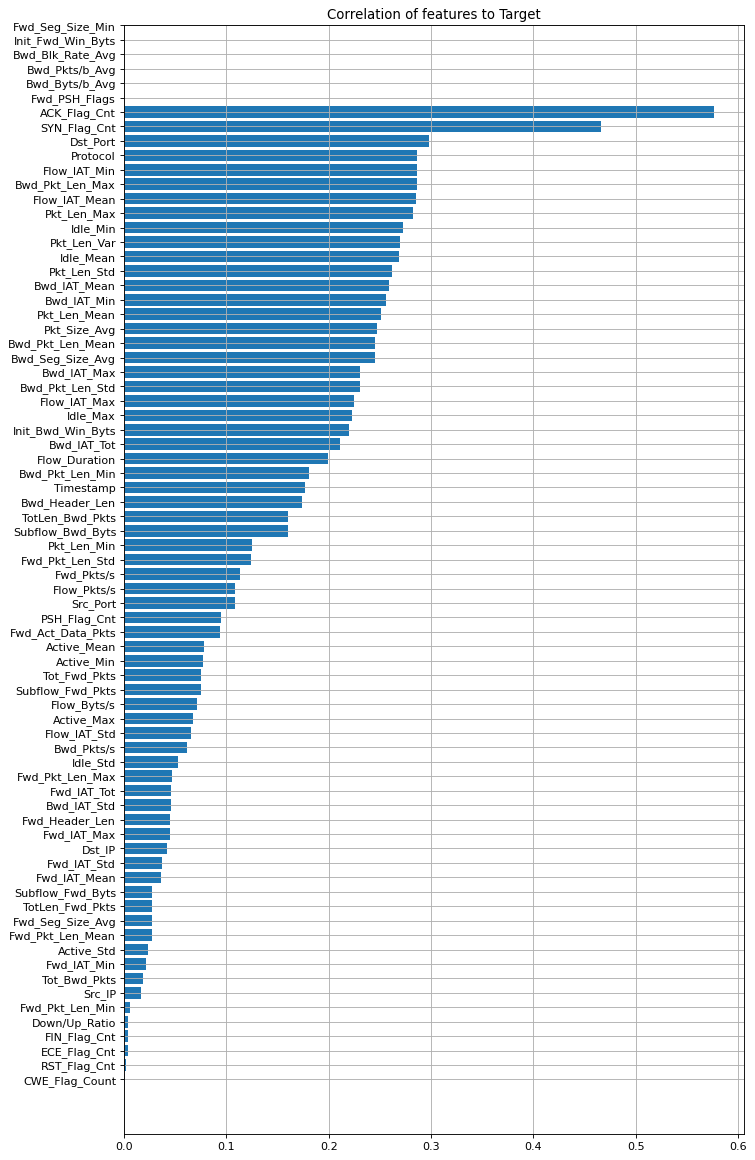

In [37]:
def plot_corr_scores(corr_data, target):
    """
    Displays the horizontal bar plot showing how features are correlated with the target variable
    corr_data: The DataFrame containing the correlation scores between all the features
    target: The dependent variable whoes value you aim to predict
    """
    scores = corr_data.abs()[target].drop(target)
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Correlation of features to Target")
    plt.grid()
    
plt.figure(dpi=80, figsize=(10,18))
plot_corr_scores(corr_data, "Attack")


The results above shows the correlation of each column with the Attack column

In [38]:
# Separating the dataset in preparation for feature selection 
X = encoded_merged_dataset.drop(columns=["Attack"])
Y = encoded_merged_dataset["Attack"]

In [39]:
#Get the training and test set from the depression dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 45)

In [40]:
# Count the frequency of all labels
label_counts = Y.value_counts()
print(label_counts.reindex())

Attack
1    281243
0     59390
4     56744
3     38598
2     25862
Name: count, dtype: int64


In [41]:
# Count the frequency of each label in the training data
label_counts = y_train.value_counts()
print(label_counts.reindex())

Attack
1    196578
0     41773
4     39682
3     27050
2     18202
Name: count, dtype: int64


In [42]:
# Count the frequency of each label in the test data
label_counts = y_test.value_counts()
print(label_counts.reindex())

Attack
1    84665
0    17617
4    17062
3    11548
2     7660
Name: count, dtype: int64


##### Training some models and get their performance on the dataset 

In [44]:
# Importing some models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#### DecisionTreeClassifier

In [45]:
# DecisionTreeClassifier Model Training
dt_model = DecisionTreeClassifier(random_state=30, max_depth=25)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=25, random_state=30)

In [46]:
#Get Models Prediction
y_pred = dt_model.predict(x_test)

In [47]:
y_pred

array([1, 3, 2, ..., 1, 0, 1])

In [69]:
def generateConfusionMatrix(y_pred, y_test):
    #Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    import seaborn as sns

    #Setting the labels
    labels = ['dos (0)', 'mirai (1)', 'mitm (2)', 'normal (3)', 'scan (4)']

    #Plot the Confusion matrix graph
    fig= plt.figure(figsize=(8, 5))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')
    ax.set_xlabel('Predicted Labels', fontsize=10)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(labels, fontsize = 5)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True Labels', fontsize=10)
    ax.yaxis.set_ticklabels(labels, fontsize = 10)
    plt.yticks(rotation=0)

    plt.title('Confusion Matrix', fontsize=15)

    # plt.savefig(name_of_model, 'Confusion matrix')
    plt.show()

[[17617     0     0     0     0]
 [    0 84665     0     0     0]
 [    0     0  7660     0     0]
 [    0     0     0 11548     0]
 [    0     0     0     0 17062]]


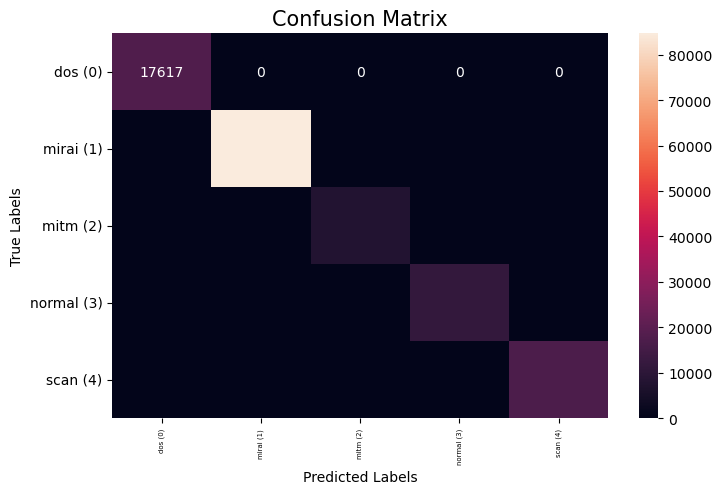

In [49]:
# Decision Tree Confusion Matrix
generateConfusionMatrix(y_pred, y_test)

In [50]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['dos (0)', 'mirai (1)', 'mitm (2)', 'normal (3)', 'scan (4)']))

              precision    recall  f1-score   support

     dos (0)       1.00      1.00      1.00     17617
   mirai (1)       1.00      1.00      1.00     84665
    mitm (2)       1.00      1.00      1.00      7660
  normal (3)       1.00      1.00      1.00     11548
    scan (4)       1.00      1.00      1.00     17062

    accuracy                           1.00    138552
   macro avg       1.00      1.00      1.00    138552
weighted avg       1.00      1.00      1.00    138552



In [68]:
def ModelPerformanceGenerator(y_test, y_pred):
    # Evaluate the model using accuracy, precision, recall, and F1-score
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    # Print the evaluation metrics
    print("Accuracy: %.2f" %(accuracy*100))
    print("Precision: %.2f" %(precision*100))
    print("Recall: %.2f" %(recall*100))
    print("F1-score: %.2f" %(f1*100))

In [52]:
#
ModelPerformanceGenerator(y_test, y_pred)

Accuracy: 100.00
Precision: 100.00
Recall: 100.00
F1-score: 100.00


#### RandomForestClassifier

In [53]:
# RandomForestClassifier Model Training
rf_model = RandomForestClassifier(random_state=30)
rf_model.fit(x_train, y_train)

RandomForestClassifier(random_state=30)

In [54]:
#Get Models Prediction
y_pred = rf_model.predict(x_test)

[[17606     0     6     5     0]
 [    0 84665     0     0     0]
 [    0     0  7658     1     1]
 [    0     0    28 11520     0]
 [    0     0     1     0 17061]]


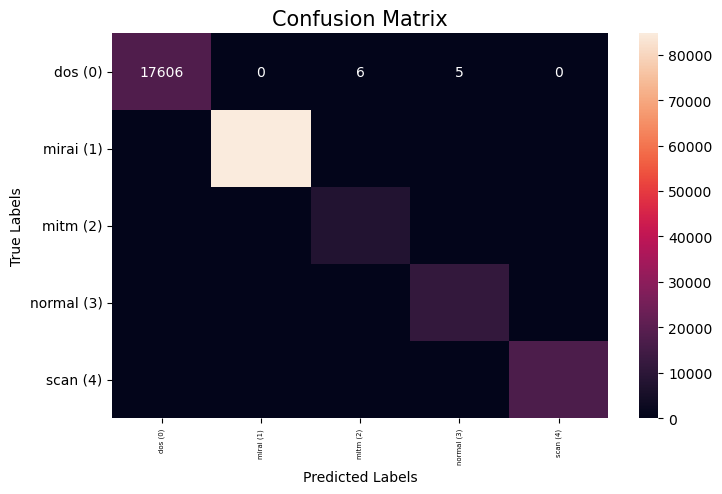

In [55]:
generateConfusionMatrix(y_pred, y_test)

In [56]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['dos (0)', 'mirai (1)', 'mitm (2)', 'normal (3)', 'scan (4)']))

              precision    recall  f1-score   support

     dos (0)       1.00      1.00      1.00     17617
   mirai (1)       1.00      1.00      1.00     84665
    mitm (2)       1.00      1.00      1.00      7660
  normal (3)       1.00      1.00      1.00     11548
    scan (4)       1.00      1.00      1.00     17062

    accuracy                           1.00    138552
   macro avg       1.00      1.00      1.00    138552
weighted avg       1.00      1.00      1.00    138552



In [57]:
ModelPerformanceGenerator(y_test, y_pred)

Accuracy: 99.97
Precision: 99.90
Recall: 99.93
F1-score: 99.91


#### KNeighborsClassifier

In [58]:
# KNeighborsClassifier Model Training
knn_model = KNeighborsClassifier()
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [59]:
#Get Models Prediction
y_pred = knn_model.predict(x_test)

[[17606     0    11     0     0]
 [    0 84665     0     0     0]
 [    0     0  7660     0     0]
 [    0     0     0 11548     0]
 [    0     0     0     0 17062]]


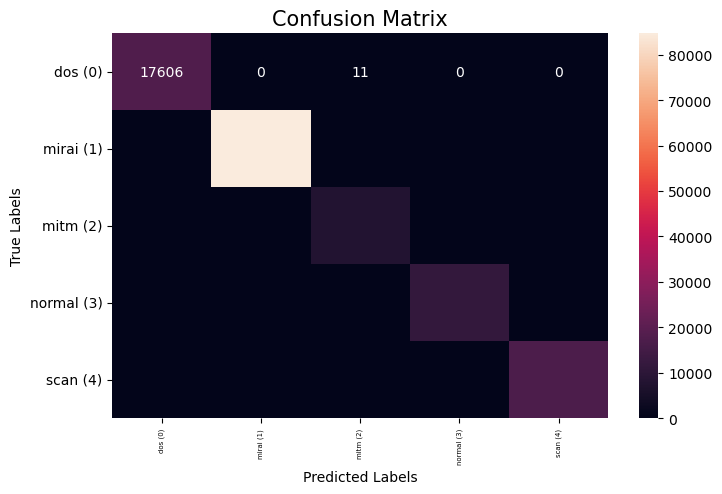

In [60]:
generateConfusionMatrix(y_pred, y_test)

In [61]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['dos (0)', 'mirai (1)', 'mitm (2)', 'normal (3)', 'scan (4)']))

              precision    recall  f1-score   support

     dos (0)       1.00      1.00      1.00     17617
   mirai (1)       1.00      1.00      1.00     84665
    mitm (2)       1.00      1.00      1.00      7660
  normal (3)       1.00      1.00      1.00     11548
    scan (4)       1.00      1.00      1.00     17062

    accuracy                           1.00    138552
   macro avg       1.00      1.00      1.00    138552
weighted avg       1.00      1.00      1.00    138552



In [62]:
ModelPerformanceGenerator(y_test, y_pred)

Accuracy: 99.99
Precision: 99.97
Recall: 99.99
F1-score: 99.98


##### Extract New Dataset with suggested features: The Genetic Algorithm has suggested the above dataset features (columns) as the best for IOT network intrusion detection

In [43]:
#In case of kernel restart 
selected_features_indices = [0,  1,  2,  3,  5, 10, 11, 16, 19, 20, 22, 23, 25, 26, 28, 29, 30,
       33, 34, 35, 36, 37, 38, 42, 43, 45, 48, 49, 51, 52, 53, 55, 57, 61,
       63, 64, 65, 69, 73]

In [44]:
# Generate the subset of GA selected feature columns
x_train_subset = x_train.iloc[:, selected_features_indices]
x_test_subset = x_test.iloc[:, selected_features_indices]

In [45]:
#Showing the GA proposed training dataset
x_train_subset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Timestamp,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Std,Flow_IAT_Max,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Pkt_Len_Mean,Pkt_Len_Std,FIN_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Pkts/b_Avg,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Min,Idle_Min
560261,25889,51995,233,8899,1564024830,32.0,32.0,32.0,2.461538e+06,76923.076923,6.506407,24.0,28.0,14.000000,17.0,11.0,0.0,0.0,0.0,0,24,8,57692.307692,32.0,0.0,0,0,0,0,0.0,40.000000,32.0,0,32,-1,3,0,0.0,11.0
562465,57908,443,205,60822,1559534640,0.0,0.0,0.0,0.000000e+00,25974.025974,0.000000,77.0,0.0,0.000000,0.0,0.0,77.0,77.0,77.0,0,0,40,0.000000,0.0,0.0,0,0,1,0,0.0,0.000000,0.0,0,0,26280,0,0,0.0,77.0
154503,25883,9020,203,49784,1558328208,1388.0,1388.0,1388.0,1.293088e+07,13824.884793,31.819805,131.0,131.0,131.000000,131.0,131.0,0.0,0.0,0.0,0,64,32,9216.589862,1048.5,679.0,0,0,1,0,0.0,1398.000000,1388.0,0,1388,1869,2,0,0.0,86.0
206301,25889,64779,233,9988,1564024829,32.0,32.0,32.0,3.035897e+07,948717.948718,1.441725,8.0,34.0,0.971429,8.0,0.0,0.0,0.0,0.0,0,288,8,923076.923077,32.0,0.0,0,0,0,0,0.0,32.864865,32.0,0,32,-1,36,0,2.0,5.0
19842,7819,5475,205,19604,1559691855,0.0,0.0,0.0,0.000000e+00,1247.660636,0.000000,1603.0,0.0,0.000000,0.0,0.0,1603.0,1603.0,1603.0,0,0,40,0.000000,0.0,0.0,0,0,0,0,0.0,0.000000,0.0,0,0,0,0,0,0.0,1603.0


In [46]:
#Showing the GA proposed training dataset
x_test_subset.head()

,Src_IP,Src_Port,Dst_IP,Dst_Port,Timestamp,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Bwd_Pkt_Len_Min,Flow_Byts/s,Flow_Pkts/s,Flow_IAT_Std,Flow_IAT_Max,Fwd_IAT_Tot,Fwd_IAT_Mean,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Tot,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Fwd_Header_Len,Bwd_Header_Len,Fwd_Pkts/s,Pkt_Len_Mean,Pkt_Len_Std,FIN_Flag_Cnt,PSH_Flag_Cnt,ACK_Flag_Cnt,ECE_Flag_Cnt,Down/Up_Ratio,Pkt_Size_Avg,Bwd_Seg_Size_Avg,Bwd_Pkts/b_Avg,Subflow_Bwd_Byts,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Min,Idle_Min
494719,25883,60089,233,8899,1564024868,32.0,32.0,32.0,5.090909e+06,159090.909091,2.875181,13.0,31.0,6.200000,7.0,5.0,0.0,0.0,0.0,0,48,8,136363.636364,32.0,0.0,0,0,0,0,0.0,36.571429,32.0,0,32,-1,6,0,0.0,5.0
33331,25883,9020,203,49784,1558328306,766.0,766.0,766.0,2.896030e+06,3780.718336,0.000000,529.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0,32,32,1890.359168,766.0,0.0,0,1,1,0,1.0,1149.000000,766.0,0,766,1869,1,0,0.0,529.0
621741,25886,53242,200,9020,1559274987,0.0,0.0,0.0,0.000000e+00,20408.163265,0.707107,74.0,73.0,73.000000,73.0,73.0,0.0,0.0,0.0,0,64,32,13605.442177,0.0,0.0,0,0,1,0,0.0,0.000000,0.0,0,0,32158,0,0,0.0,73.0
359103,25883,60054,233,8899,1564024864,32.0,32.0,32.0,1.100000e+07,343750.000000,2.201010,8.0,30.0,3.333333,8.0,1.0,0.0,0.0,0.0,0,80,8,312500.000000,32.0,0.0,0,0,0,0,0.0,34.909091,32.0,0,32,-1,10,0,1.0,2.0
110887,25889,51697,188,443,1559533944,2896.0,0.0,1448.0,3.407059e+07,23529.411765,0.000000,85.0,0.0,0.000000,0.0,0.0,85.0,85.0,85.0,0,0,64,0.000000,1448.0,0.0,0,0,1,0,0.0,2172.000000,1448.0,0,2896,41,0,0,0.0,85.0


### The BiLSTM model

In [48]:
# The importing important modules
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [49]:
# Creating the structure of the BiLSTM model

# Define the BiLSTM model
BiLSTM_model = Sequential()
BiLSTM_model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(x_train_subset.shape[1], 1))) 
BiLSTM_model.add(Dropout(0.5))
BiLSTM_model.add(Dense(5, activation='softmax'))
# Compiling the model
BiLSTM_model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

/opt/anaconda3/envs/feyi/lib/python3.11/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [50]:
#Model summary
BiLSTM_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 39, 512)        │       528,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 39, 512)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 39, 5)          │         2,565 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 530,949 (2.03 MB)

 Trainable params: 530,949 (2.03 MB)

 Non-trainable params: 0 (0.00 B)

In [78]:
# Early stopping and learning rate reduction to improve performance and avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.0001)

In [79]:
# Model training 
BiLSTM_model_history = BiLSTM_model.fit(x_train_subset, y_train, epochs=30, validation_split=0.3, shuffle=True, batch_size=64, callbacks=[early_stopping, reduce_lr])

Epoch 1/30
3536/3536 ━━━━━━━━━━━━━━━━━━━━ 668s 188ms/step - accuracy: 0.7956 - loss: 0.4614 - val_accuracy: 0.8298 - val_loss: 0.3784 - learning_rate: 0.0010
Epoch 2/30
3536/3536 ━━━━━━━━━━━━━━━━━━━━ 618s 175ms/step - accuracy: 0.8279 - loss: 0.3638 - val_accuracy: 0.8341 - val_loss: 0.3367 - learning_rate: 0.0010
Epoch 3/30
3536/3536 ━━━━━━━━━━━━━━━━━━━━ 617s 174ms/step - accuracy: 0.8329 - loss: 0.3516 - val_accuracy: 0.8346 - val_loss: 0.3455 - learning_rate: 0.0010
Epoch 4/30
3536/3536 ━━━━━━━━━━━━━━━━━━━━ 705s 199ms/step - accuracy: 0.8332 - loss: 0.3499 - val_accuracy: 0.8403 - val_loss: 0.3304 - learning_rate: 0.0010
Epoch 5/30
3536/3536 ━━━━━━━━━━━━━━━━━━━━ 642s 182ms/step - accuracy: 0.8393 - loss: 0.3400 - val_accuracy: 0.8440 - val_loss: 0.3261 - learning_rate: 0.0010
Epoch 6/30
3536/3536 ━━━━━━━━━━━━━━━━━━━━ 2668s 755ms/step - accuracy: 0.8418 - loss: 0.3341 - val_accuracy: 0.8484 - val_loss: 0.3170 - learning_rate: 0.0010
Epoch 7/30
3536/3536 ━━━━━━━━━━━━━━━━━━━━ 983s 278m

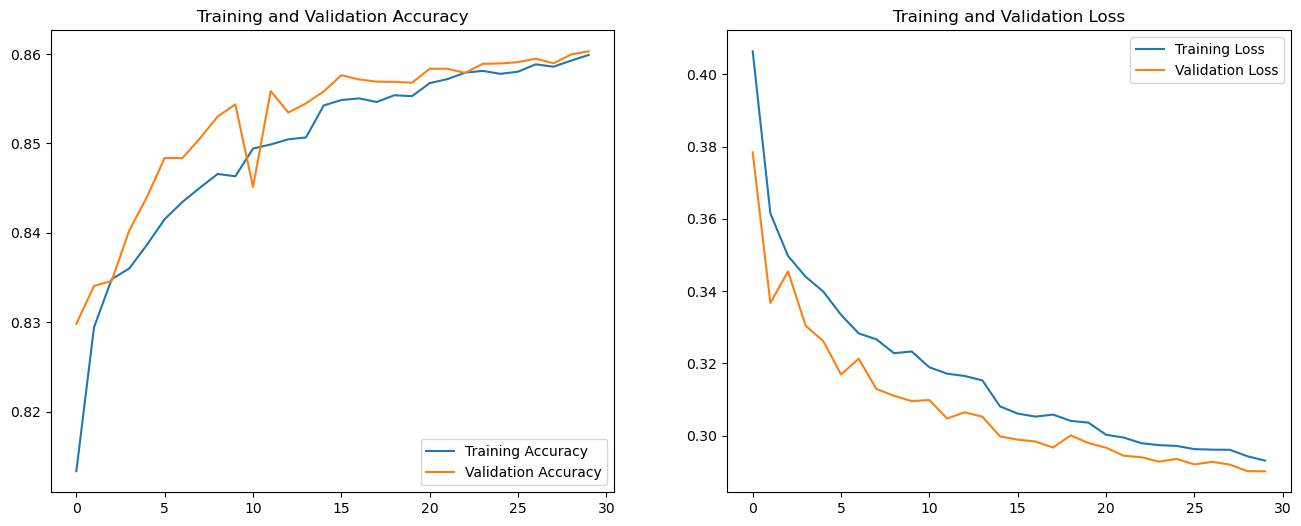

In [80]:
#Plotting the BiLSTM model results

#Getting the accuracy
acc = BiLSTM_model_history.history['accuracy']
val_acc = BiLSTM_model_history.history['val_accuracy']

#Getting the losses
loss = BiLSTM_model_history.history['loss']
val_loss = BiLSTM_model_history.history['val_loss']

#No of epochs it trained
epochs_range = BiLSTM_model_history.epoch

#Plotting Training and Validation accuracy
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

#Plotting Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [81]:
# Evaluating the model's accuracy on the test data
evaluation_result = BiLSTM_model.evaluate(x_test_subset, y_test)

4330/4330 ━━━━━━━━━━━━━━━━━━━━ 178s 41ms/step - accuracy: 0.8598 - loss: 0.2919


In [82]:
print("Loss of the model is - " , evaluation_result[0])
print("Accuracy of the model is - " , evaluation_result[1]*100 , "%")

Loss of the model is -  0.2918747067451477
Accuracy of the model is -  86.0117495059967 %


In [83]:
#Get model's prediction on the test data
BiLSTM_model_predictions = BiLSTM_model.predict(x_test_subset)

4330/4330 ━━━━━━━━━━━━━━━━━━━━ 173s 40ms/step


In [84]:
BiLSTM_model_predictions

array([[3.94116231e-14, 1.00000000e+00, 3.54042617e-09, 1.85001814e-09,
        1.28785871e-08],
       [1.18684923e-07, 8.01789793e-06, 7.73922579e-08, 9.99991417e-01,
        3.94362786e-07],
       [7.81093263e-07, 4.48772281e-01, 1.44349128e-01, 4.69537592e-03,
        4.02182311e-01],
       ...,
       [2.21154278e-06, 3.13143075e-01, 1.82471097e-01, 6.96261274e-03,
        4.97420937e-01],
       [1.00000000e+00, 2.19704515e-11, 4.28503136e-11, 4.81068310e-11,
        1.64515116e-13],
       [3.13337011e-07, 3.83313358e-01, 1.18338585e-01, 2.62871804e-03,
        4.95718986e-01]], dtype=float32)

In [85]:
#convert the models prediction value here so it will just be inform of 0,1,2,3,...
y_pred = np.argmax(BiLSTM_model_predictions, axis=-1) 

In [86]:
y_pred

array([1, 3, 1, ..., 4, 0, 4])

[[17599     2     0     4     0]
 [   16 73416  1801   312  1789]
 [    0   346  3027     4    19]
 [    2    24    47  9908    33]
 [    0 10877  2785  1320 15221]]


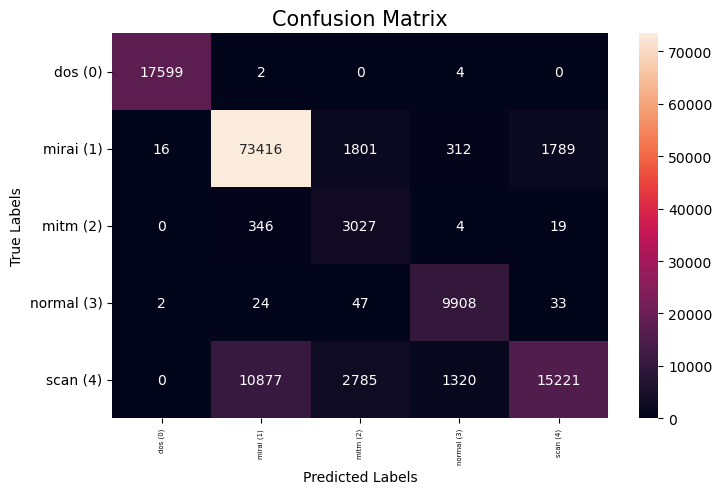

In [87]:
#Import confusion_matrix for evaluation
generateConfusionMatrix(y_test, y_pred)

In [88]:
#Classification report
print(classification_report(y_test, y_pred, target_names = ['dos (0)', 'mirai (1)', 'mitm (2)', 'normal (3)', 'scan (4)']))

              precision    recall  f1-score   support

     dos (0)       1.00      1.00      1.00     17617
   mirai (1)       0.95      0.87      0.91     84665
    mitm (2)       0.89      0.40      0.55      7660
  normal (3)       0.99      0.86      0.92     11548
    scan (4)       0.50      0.89      0.64     17062

    accuracy                           0.86    138552
   macro avg       0.87      0.80      0.80    138552
weighted avg       0.90      0.86      0.87    138552



In [89]:
ModelPerformanceGenerator(y_test, y_pred)

Accuracy: 86.01
Precision: 86.67
Recall: 80.23
F1-score: 80.33
